In [8]:
import subprocess
video_pth="../Train/anomaly/5.mp4"
output_pth="../Train/anomaly/output5.h264"
res_pth="../Train/anomaly/res5.json"
command = ['ffmpeg', '-i', video_pth, '-c:v', 'libx264', output_pth]

try:
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
except subprocess.CalledProcessError as e:
    print("FFmpeg returned an error:", e.stderr)

In [9]:
import subprocess

command = ["ffprobe", "-select_streams", "v:0", "-show_frames", "-print_format", "json", output_pth]

with open(res_pth, "w") as file:
    subprocess.call(command, stdout=file)

In [10]:
import pandas as pd
df=pd.read_json(res_pth)

In [13]:
import json
 
 
# Convert JSON String to Python
student_details = json.loads(res_pth)
 


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [14]:
with open(res_pth, 'r') as fh:
    jd1 = json.load(fh)

In [16]:
jd1["frames"]

[{'media_type': 'video',
  'stream_index': 0,
  'key_frame': 1,
  'duration': 48000,
  'duration_time': '0.040000',
  'pkt_pos': '0',
  'pkt_size': '38502',
  'width': 720,
  'height': 576,
  'crop_top': 0,
  'crop_bottom': 0,
  'crop_left': 0,
  'crop_right': 0,
  'pix_fmt': 'yuv420p',
  'sample_aspect_ratio': '1:1',
  'pict_type': 'I',
  'interlaced_frame': 0,
  'top_field_first': 0,
  'repeat_pict': 0,
  'color_range': 'tv',
  'color_space': 'bt470bg',
  'color_primaries': 'bt470bg',
  'color_transfer': 'bt470bg',
  'chroma_location': 'left',
  'side_data_list': [{'side_data_type': 'H.26[45] User Data Unregistered SEI message'}]},
 {'media_type': 'video',
  'stream_index': 0,
  'key_frame': 0,
  'duration': 48000,
  'duration_time': '0.040000',
  'pkt_pos': '38502',
  'pkt_size': '1094',
  'width': 720,
  'height': 576,
  'crop_top': 0,
  'crop_bottom': 0,
  'crop_left': 0,
  'crop_right': 0,
  'pix_fmt': 'yuv420p',
  'sample_aspect_ratio': '1:1',
  'pict_type': 'P',
  'interlaced_f

In [17]:
df=pd.DataFrame(jd1["frames"])

In [18]:
df

,media_type,stream_index,key_frame,duration,duration_time,pkt_pos,pkt_size,width,height,crop_top,crop_bottom,crop_left,crop_right,pix_fmt,sample_aspect_ratio,pict_type,interlaced_frame,top_field_first,repeat_pict,color_range,color_space,color_primaries,color_transfer,chroma_location,side_data_list
0,video,0,1,48000,0.040000,0,38502,720,576,0,0,0,0,yuv420p,1:1,I,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,[{'side_data_type': 'H.26[45] User Data Unregi...
1,video,0,0,48000,0.040000,38502,1094,720,576,0,0,0,0,yuv420p,1:1,P,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,NaN
2,video,0,0,48000,0.040000,39596,2097,720,576,0,0,0,0,yuv420p,1:1,P,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,NaN
3,video,0,0,48000,0.040000,41693,2408,720,576,0,0,0,0,yuv420p,1:1,P,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,NaN
4,video,0,0,48000,0.040000,44101,2561,720,576,0,0,0,0,yuv420p,1:1,P,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18084,video,0,0,48000,0.040000,44466788,706,720,576,0,0,0,0,yuv420p,1:1,P,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,NaN
18085,video,0,0,48000,0.040000,44467494,527,720,576,0,0,0,0,yuv420p,1:1,P,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,NaN
18086,video,0,0,48000,0.040000,44468021,417,720,576,0,0,0,0,yuv420p,1:1,P,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,NaN
18087,video,0,0,48000,0.040000,44468438,339,720,576,0,0,0,0,yuv420p,1:1,P,0,0,0,tv,bt470bg,bt470bg,bt470bg,left,NaN


In [19]:
vid=df[["pkt_pos",	"pkt_size","pict_type"]]

In [28]:
vid.loc[:,"min"]=vid.index/25/60

In [42]:
vid.loc[:,"pkt_pos"]=vid["pkt_pos"].astype(int)

In [43]:
vid.loc[:,"pkt_size"]=vid["pkt_size"].astype(int)

In [44]:
vid.describe()


,pkt_pos,pkt_size,min
count,1.808900e+04,18089.000000,18089.000000
mean,2.232246e+07,2458.346896,6.029333
std,1.210177e+07,3294.192324,3.481326
min,0.000000e+00,124.000000,0.000000
25%,1.255909e+07,1534.000000,3.014667
50%,2.286184e+07,2368.000000,6.029333
75%,3.227585e+07,2712.000000,9.044000
max,4.446878e+07,59249.000000,12.058667


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

перекрытие [(11.02, 11.15), (11.19, 11.3)]
движение [(0.03, 0.04), (5.24, 5.25), (7.34, 7.35), (8.27, 8.28), (8.58, 9.2), (9.07, 11.02), (11.54, 11.58)]
0.010000000000000002
0.009999999999999787
0.009999999999999787
0.009999999999999787
расфокус [(2.41, 3.41)]


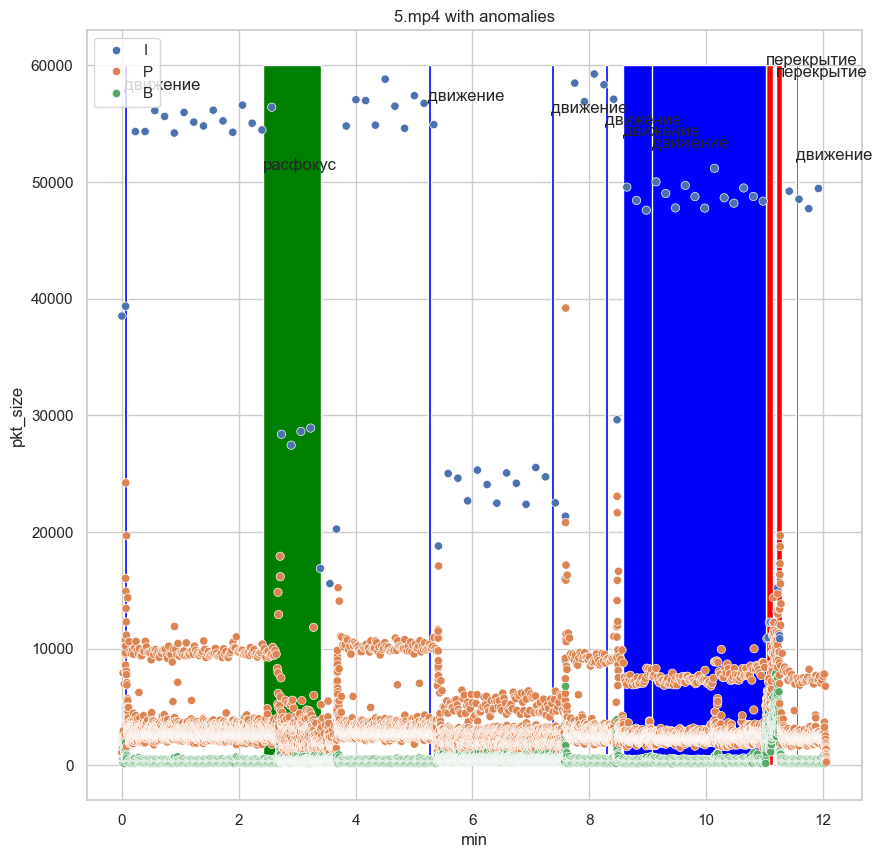

In [137]:
from matplotlib.patches import Rectangle
fig,ax=plt.subplots(1,figsize=(10,10))

timesteps={"перекрытие":  [(11.02,11.15), (11.19,11.30)],
 "движение":[(0.03,0.04), (05.24,05.25), (07.34,07.35), (08.27,08.28), (08.58,09.20), (09.07,11.02), (11.54,11.58)] ,
 "расфокус":[(02.41,03.41)]}
color={"перекрытие":  "red",
 "движение":"blue",
 "расфокус":"green"}
cnt=0
for name, times in timesteps.items():
    print(name,times)
    for x in times:
        
        c=color[name]
        someX, someY = 2, 5000
        currentAxis = plt.gca()
        width=x[1]-x[0]
        if width <1/60:
            print(width)
            width=3/60
        currentAxis.add_patch(Rectangle((x[0],0),width,60000, facecolor=c))
        plt.annotate(name,xy=(x[0],60000-cnt*1000))
        cnt+=1

sns.scatterplot(x="min",y="pkt_size",hue="pict_type",data=vid,ax=ax)


plt.legend(loc="upper left")
ax.title.set_text("5.mp4 with anomalies")
sns.set_style("whitegrid")
plt.show()

